In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
#Set parameters
Lx = 0.01
Ly = 0.01
nx = 21
ny = 21
dx = Lx / (nx-1)
dy = Ly / (ny-1)
alpha = 1e-4

#Save memory space icin 2D array kullanmadim
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

#Initial conditions
T0 = 20.0 * numpy.ones((ny, nx))
T0[0, :] = 100.0 # bottom
T0[:, 0] = 100.0

In [7]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x = alpha*dt/ dx**2
    sigma_y = alpha*dt / dy**2
    I = int(nx/2)
    J = int(ny/2)
    for n in range(nt):
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                T[j, i] = T[j, i] + sigma_x*(T[j, i-1] - 2*T[j,i] + T[j, i+1]) + sigma_y * (T[j-1, i] -2*T[j,i] + T[j+1, i])
#        T[1 : -1, 1: -1] = T[1:-1, 1:-1] + sigma_x*(T[1:-1, :-2])  #Interior points computation
        T[0, :] = 100.0 #Bottom
        T[:, 0] = 100.0 #Left
        T[-1, :] = T[-2, :] #Top boundary
        T[:, -1] = T[:, -2] #Right boundary
        #We are interested in the tempertaure at the center and we dont want it to arrive or exceed certain value
        if T[J, I] >= 70.0:
            break
    print('Time step {}; temperature at the center is {} C'.format(n, T[J,I]))
    return T
        

In [14]:
#Explicit scheme so there is some stability constraint
sigma = 0.5
dt = sigma / (alpha* (1/dx**2+ 1/dy**2) )
nt = 500 #time step

In [15]:
T = ftcs(T0, nt, dt, dx, dy, alpha)

Time step 127; temperature at the center is 70.12723235676388 C


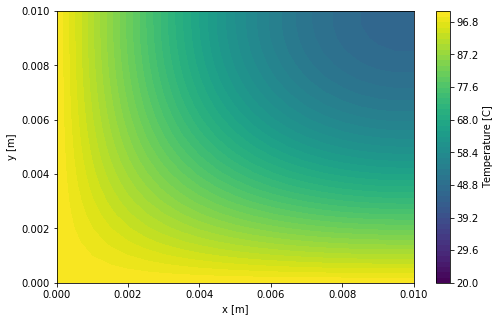

In [22]:
#we need to visualize the solution
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x [m]')
pyplot.ylabel('y [m]')
contf = pyplot.contourf(x, y, T, levels = numpy.linspace(20.0, 100.0,num=51))
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')